**BUSINESS PROBLEM**: There are two types of cab companies in the US; Pink Cab and Yellow Cab. We want to find out which would be a better company for investment.


**IMPORTING THE LIBRARIES**

In [54]:
import pandas as pd
import numpy as np

**LOADING THE DATASET**

In [55]:
cab_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Data Glacier/Week 2/Datasets/Cab_Data.csv')
city_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Data Glacier/Week 2/Datasets/City.csv')
customer_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Data Glacier/Week 2/Datasets/Customer_ID.csv')
transaction_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Data Glacier/Week 2/Datasets/Transaction_ID.csv')

In [56]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [57]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [58]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


"Date of Travel" column to be converted into the appropriate format.

In [59]:
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'], unit='D', origin='1899-12-30')

# Check the starting and ending dates
start_date = cab_df['Date of Travel'].min()
end_date = cab_df['Date of Travel'].max()

print("Starting Date:", start_date)
print("Ending Date:", end_date)

Starting Date: 2016-01-02 00:00:00
Ending Date: 2018-12-31 00:00:00


In [60]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [61]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [62]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [63]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [64]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [65]:
customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [66]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [67]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [68]:
transaction_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


**MERGING THE DATASETS INTO MASTER DATA**

In [69]:
#Merging the transaction_df and customer_df based on 'Customer ID'
merged_df = pd.merge(transaction_df, customer_df, on='Customer ID')

In [70]:
#Merging the cab_df and merged_df based on 'Transaction ID'
merged_df = pd.merge(merged_df, cab_df, on='Transaction ID')

In [71]:
#Merging the merged_df and city_df based on 'City'
master_df = pd.merge(merged_df, city_df, on='City')

In [72]:
master_df

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,Female,29,6829,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,10319775,51406,Cash,Female,29,6829,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,10347676,51406,Card,Female,29,6829,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,10358624,51406,Cash,Female,29,6829,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


In [73]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-75-857b8a11addd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = master_df.corr()


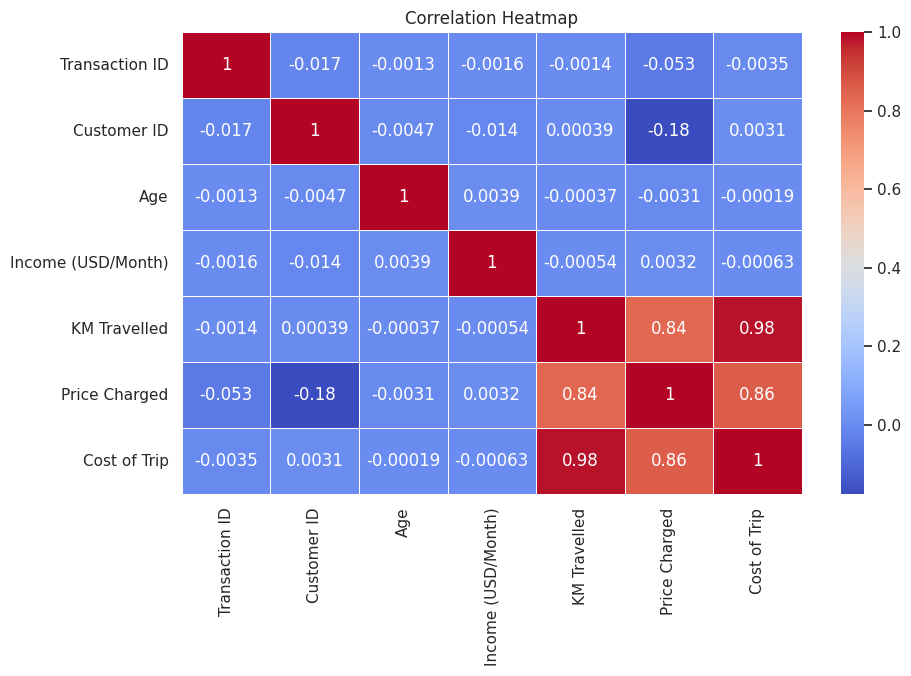

In [75]:
correlation_matrix = master_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

We can see that the "KM Travelled", "COst of Trip", and the "Price Charged" columns are highly correlated.

In [76]:
master_df.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000


In [77]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [78]:
master_df.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64

In [79]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [80]:
custom_palette = ['#FF6B6B', '#74B9FF']

**EXPLORATORY DATA ANALYSIS**

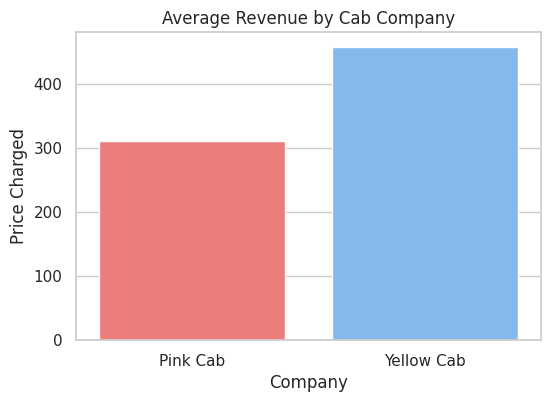

In [81]:
#Revenue by Cab Company
plt.figure(figsize=(6, 4))
sns.barplot(x='Company', y='Price Charged', data=master_df, errorbar=None, palette=custom_palette)
plt.title('Average Revenue by Cab Company')
plt.show()

The Yellow Cab has the higher average revenue.

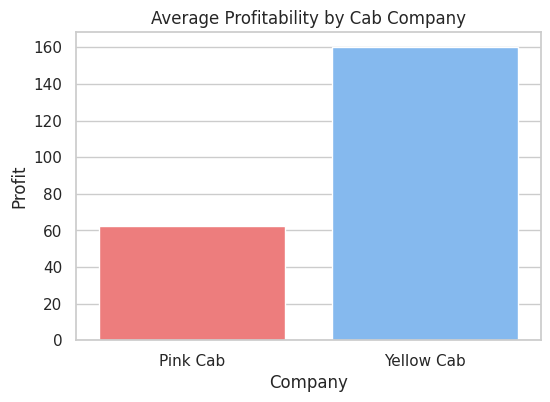

In [82]:
#Profitability by Cab Company
master_df['Profit'] = master_df['Price Charged'] - master_df['Cost of Trip']
plt.figure(figsize=(6, 4))
sns.barplot(x='Company', y='Profit', data=master_df, errorbar=None, palette=custom_palette)
plt.title('Average Profitability by Cab Company')
plt.show()

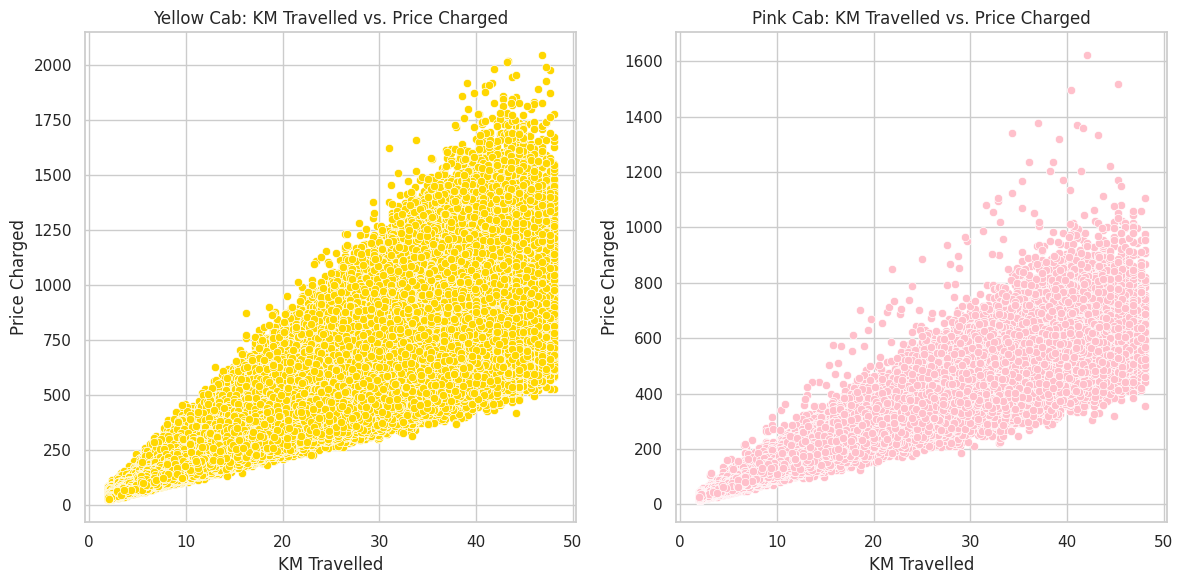

In [83]:
# Create separate scatterplots for each cab company
plt.figure(figsize=(12, 6))

# Scatterplot for Yellow Cab
plt.subplot(1, 2, 1)
sns.scatterplot(data=master_df[master_df['Company'] == 'Yellow Cab'], x='KM Travelled', y='Price Charged', color='gold')
plt.title('Yellow Cab: KM Travelled vs. Price Charged')

# Scatterplot for Pink Cab
plt.subplot(1, 2, 2)
sns.scatterplot(data=master_df[master_df['Company'] == 'Pink Cab'], x='KM Travelled', y='Price Charged', color='pink')
plt.title('Pink Cab: KM Travelled vs. Price Charged')

plt.tight_layout()
plt.show()

The Yellow cab makes the larger profit.

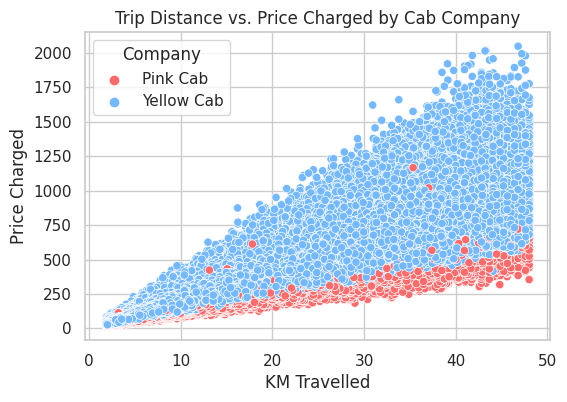

In [84]:
#Trip Distance and Price Charged Relationship
plt.figure(figsize=(6, 4))
sns.scatterplot(data=master_df, x='KM Travelled', y='Price Charged', hue='Company', palette=custom_palette)
plt.title('Trip Distance vs. Price Charged by Cab Company')
plt.show()

Both companies charge more as travel distance increases. However, yellow cab charges more on average compared to the pink cab.

In [85]:
# Extract month and year from the date
master_df['Year'] = master_df['Date of Travel'].dt.year
master_df['Month'] = master_df['Date of Travel'].dt.month

In [86]:
# Group data by year and month and count the number of travels
travel_frequency = master_df.groupby(['Year', 'Month']).size().reset_index(name='Travel Count')

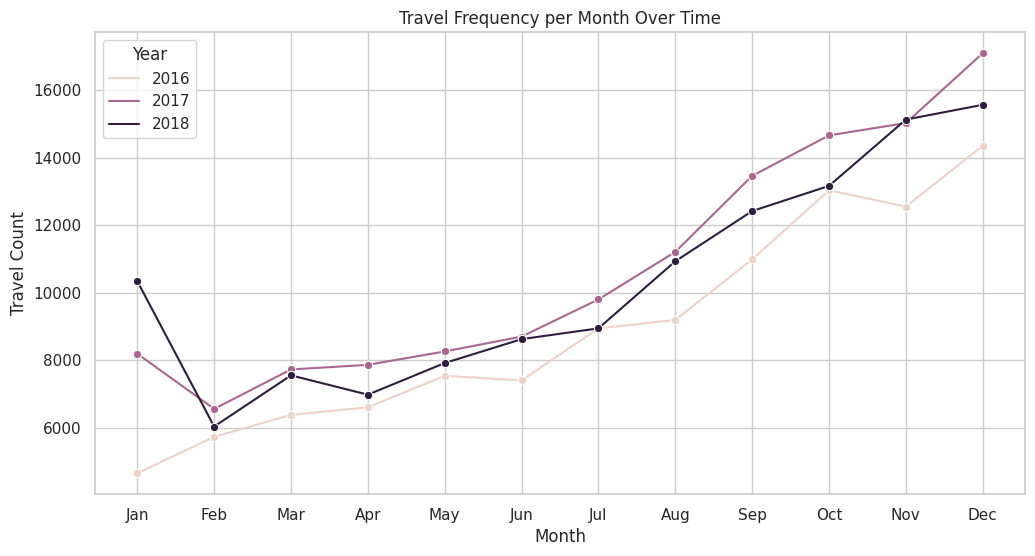

In [87]:
# Create a line plot to visualize travel frequency over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=travel_frequency, x='Month', y='Travel Count', hue='Year', marker='o')
plt.title('Travel Frequency per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Travel Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

Travel frequency is highest during the months of october to december.

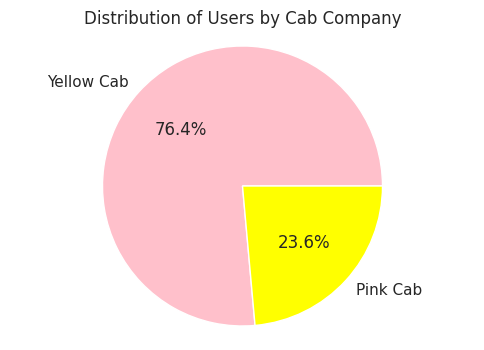

In [88]:
# Count the number of users for each cab company
user_counts = master_df['Company'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', colors=['pink', 'yellow'])
plt.title('Distribution of Users by Cab Company')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

More people prefer to use the Yellow cab service.

In [89]:
# Set a beautiful style for Seaborn
sns.set(style='whitegrid')

Text(0, 0.5, 'Frequency')

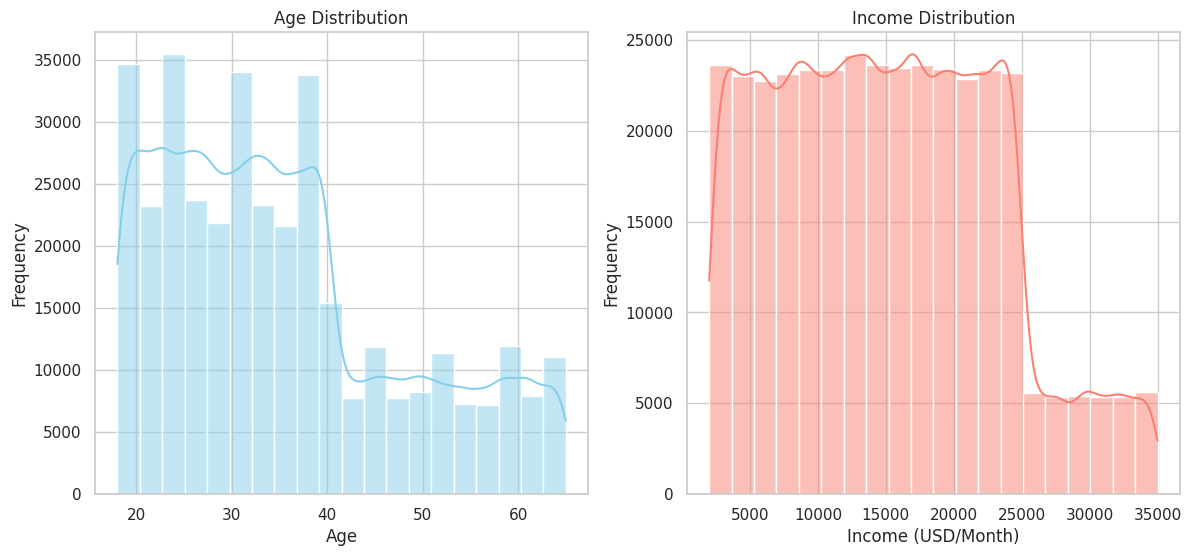

In [90]:
# 1. Customer Demographics Distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=master_df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=master_df, x='Income (USD/Month)', bins=20, kde=True, color='salmon')
plt.title('Income Distribution')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

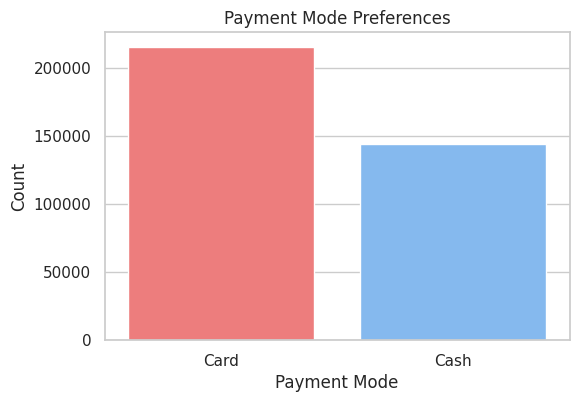

In [91]:
# 2. Payment Mode Preferences
plt.figure(figsize=(6, 4))
sns.countplot(data=master_df, x='Payment_Mode', palette=custom_palette)
plt.title('Payment Mode Preferences')
plt.xlabel('Payment Mode')
plt.ylabel('Count')

Most people tend to pay by card.

Text(0, 0.5, 'Price Charged')

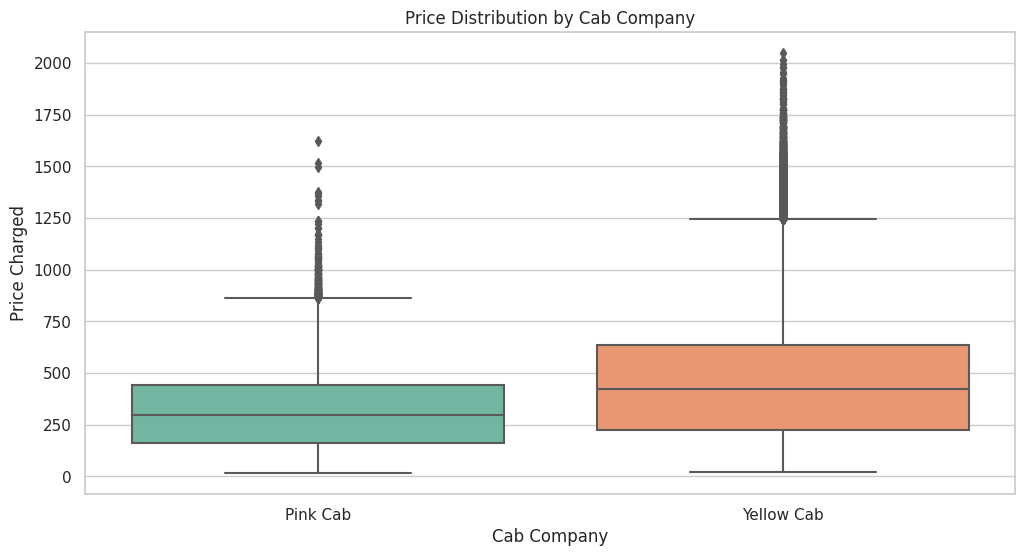

In [92]:
# 3. Price Distribution by Cab Company
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_df, x='Company', y='Price Charged', palette='Set2')
plt.title('Price Distribution by Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Price Charged')

The pay distribution is higher for the Yellow cab.

**CONCLUSION**: The EDA of the Pink Cab and Yellow Cab data reveals several key insights. There are no missing values in the master dataset. Yellow Cab currently outperforms Pink Cab in terms of profitability and user preference. The analysis suggests that investing in Yellow Cab may be the more favorable choice based on the provided data.